In [2]:
import pandas as pd
import numpy as np
import seaborn
seaborn.set()

In [3]:
data = pd.read_csv('./dataset for python.csv', encoding='iso-8859-1', sep=';')

data.sample(5)

,sum_sec,2_amper_per_hour,3_one,4_volt,5_grad,7_loop
95308,81040.458,NaN,NaN,29.13802,NaN,776.0
127689,81731.874,NaN,NaN,30.13209,NaN,776.0
105290,81256.573,NaN,NaN,28.53699,NaN,776.0
69227,80394.120,0.13039,NaN,NaN,NaN,776.0
163938,82540.295,-0.37499,NaN,NaN,NaN,776.0


In [4]:
data = data[pd.notnull(data['sum_sec'])]
print(data)

          sum_sec  2_amper_per_hour  3_one    4_volt  5_grad  7_loop
0       78721.058          -0.37499    NaN       NaN     NaN   776.0
1       78721.079               NaN    NaN  29.78417     NaN   776.0
2       78721.100          -0.12230    1.0       NaN     NaN   776.0
3       78721.122               NaN    NaN  29.78417     NaN   776.0
4       78721.143          -0.37499    NaN       NaN     NaN   776.0
...           ...               ...    ...       ...     ...     ...
234133  84179.596          -0.12230    1.0       NaN     NaN   776.0
234134  84179.618               NaN    NaN  30.28120     NaN   776.0
234135  84179.639          -0.12230    NaN       NaN     NaN   776.0
234136  84179.660               NaN    NaN  30.38061     NaN   776.0
234137  84179.681          -0.37499    1.0       NaN     NaN   776.0

[234138 rows x 6 columns]


In [5]:
data.loc[data['3_one'] != 1, '3_one'] = 0
print(data)

          sum_sec  2_amper_per_hour  3_one    4_volt  5_grad  7_loop
0       78721.058          -0.37499    0.0       NaN     NaN   776.0
1       78721.079               NaN    0.0  29.78417     NaN   776.0
2       78721.100          -0.12230    1.0       NaN     NaN   776.0
3       78721.122               NaN    0.0  29.78417     NaN   776.0
4       78721.143          -0.37499    0.0       NaN     NaN   776.0
...           ...               ...    ...       ...     ...     ...
234133  84179.596          -0.12230    1.0       NaN     NaN   776.0
234134  84179.618               NaN    0.0  30.28120     NaN   776.0
234135  84179.639          -0.12230    0.0       NaN     NaN   776.0
234136  84179.660               NaN    0.0  30.38061     NaN   776.0
234137  84179.681          -0.37499    1.0       NaN     NaN   776.0

[234138 rows x 6 columns]


In [6]:
data = data.fillna(0)
data

,sum_sec,2_amper_per_hour,3_one,4_volt,5_grad,7_loop
0,78721.058,-0.37499,0.0,0.00000,0.0,776.0
1,78721.079,0.00000,0.0,29.78417,0.0,776.0
2,78721.100,-0.12230,1.0,0.00000,0.0,776.0
3,78721.122,0.00000,0.0,29.78417,0.0,776.0
4,78721.143,-0.37499,0.0,0.00000,0.0,776.0
...,...,...,...,...,...,...
234133,84179.596,-0.12230,1.0,0.00000,0.0,776.0
234134,84179.618,0.00000,0.0,30.28120,0.0,776.0
234135,84179.639,-0.12230,0.0,0.00000,0.0,776.0
234136,84179.660,0.00000,0.0,30.38061,0.0,776.0


In [7]:
data['4_volt'][0] = 29.78417
data['5_grad'][0] = 36.1

In [8]:
data.drop(data.tail(2).index,inplace=True)

In [9]:
data

,sum_sec,2_amper_per_hour,3_one,4_volt,5_grad,7_loop
0,78721.058,-0.37499,0.0,29.78417,36.1,776.0
1,78721.079,0.00000,0.0,29.78417,0.0,776.0
2,78721.100,-0.12230,1.0,0.00000,0.0,776.0
3,78721.122,0.00000,0.0,29.78417,0.0,776.0
4,78721.143,-0.37499,0.0,0.00000,0.0,776.0
...,...,...,...,...,...,...
234131,84179.554,-0.37499,0.0,0.00000,0.0,776.0
234132,84179.575,0.00000,0.0,30.38061,0.0,776.0
234133,84179.596,-0.12230,1.0,0.00000,0.0,776.0
234134,84179.618,0.00000,0.0,30.28120,0.0,776.0


In [10]:
for index, row in enumerate(data['4_volt']):
    if row == 0:
        data['4_volt'][index] = data['4_volt'][index-1]

In [11]:
for index, row in enumerate(data['5_grad']):
    if row == 0:
        data['5_grad'][index] = data['5_grad'][index-1]

In [12]:
for index, row in enumerate(data['2_amper_per_hour']):
    if row == 0:
        data['2_amper_per_hour'][index] = data['2_amper_per_hour'][index-1]

In [55]:
data = data.drop(data[data['4_volt'] < 28].index)
data = data.drop(data[data['4_volt'] > 33].index)

data = data.drop(data[data['2_amper_per_hour'] < -1].index)
data = data.drop(data[data['2_amper_per_hour'] > 1].index)

In [13]:
data.describe()

,sum_sec,2_amper_per_hour,3_one,4_volt,5_grad,7_loop
count,234136.000000,234136.000000,234136.000000,234136.000000,234136.000000,234136.0
mean,81485.675912,-0.166983,0.263283,29.848700,31.688946,776.0
std,1587.293574,0.245953,0.440416,0.931172,43.761384,0.0
min,78721.058000,-1.133060,0.000000,27.733780,-40.100000,776.0
25%,80148.326750,-0.374990,0.000000,29.038610,-14.700000,776.0
50%,81506.479500,-0.122300,0.000000,29.833870,39.700000,776.0
75%,82884.772250,-0.122300,1.000000,30.529720,76.000000,776.0
max,84179.639000,1.393830,1.000000,34.923460,82.300000,776.0


In [56]:
x = data['sum_sec'] 

y_amper = data['2_amper_per_hour']
y_volt = data['4_volt']
y_grad = data['5_grad']

In [57]:
data

,sum_sec,2_amper_per_hour,3_one,4_volt,5_grad,7_loop
0,78721.058,-0.37499,0.0,29.78417,36.1,776.0
1,78721.079,-0.37499,0.0,29.78417,36.1,776.0
2,78721.100,-0.12230,1.0,29.78417,36.1,776.0
3,78721.122,-0.12230,0.0,29.78417,36.1,776.0
4,78721.143,-0.37499,0.0,29.78417,36.1,776.0
...,...,...,...,...,...,...
234131,84179.554,-0.37499,0.0,30.52972,54.2,776.0
234132,84179.575,-0.37499,0.0,30.38061,54.2,776.0
234133,84179.596,-0.12230,1.0,30.38061,54.2,776.0
234134,84179.618,-0.12230,0.0,30.28120,54.2,776.0


# Рассмотрим параметр y_amper - Ампер/час 

In [58]:
x = x.to_numpy()
x = x.reshape(-1, 1)

In [59]:
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [60]:
model_amper = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_amper.fit(x,y_amper)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [61]:
amper_predicts = model_amper.predict(x)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Test r2: ', r2_score(y_amper, amper_predicts))

#print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_amper, amper_predicts))

#print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_amper, amper_predicts))

Test r2:  0.038818420971140855
Test MSE:  0.058111203589562996
Test MAE:  0.1951020913624511


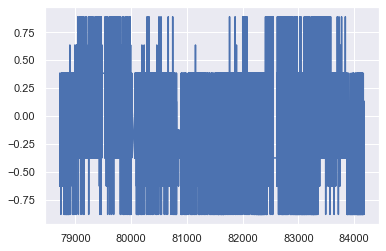

In [63]:
from matplotlib import pyplot as plt
plt.plot(x, y_amper)

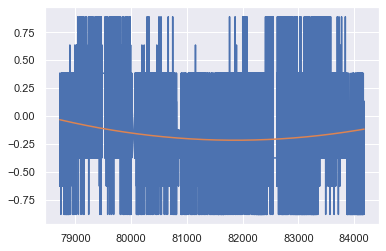

In [64]:
plt.plot(x, y_amper)
plt.plot(x, amper_predicts)

### Рассмотрим параметр y_volt - Вольты

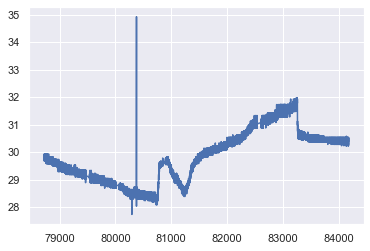

In [24]:
plt.plot(x, y_volt)

In [65]:
model_volt = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_volt.fit(x,y_volt)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [66]:
volt_predicts = model_volt.predict(x)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Test r2: ', r2_score(y_volt, volt_predicts))

#print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_volt, volt_predicts))

#print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_volt, volt_predicts))

Test r2:  0.8835654015493242
Test MSE:  0.10091687656980133
Test MAE:  0.25510079380737527


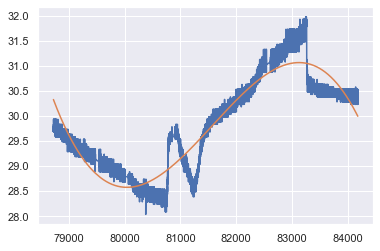

In [68]:
plt.plot(x, y_volt)
plt.plot(x, volt_predicts)

# Рассмотрим параметры y_grad

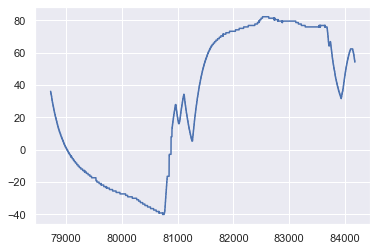

In [29]:
plt.plot(x, y_grad)

In [69]:
model_grad = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_grad.fit(x,y_grad)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [70]:
grad_predicts = model_grad.predict(x)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Test r2: ', r2_score(y_grad, grad_predicts))

#print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_grad, grad_predicts))

#print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_grad, grad_predicts))

Test r2:  0.9135776036853527
Test MSE:  165.49808282615982
Test MAE:  9.687016781211517


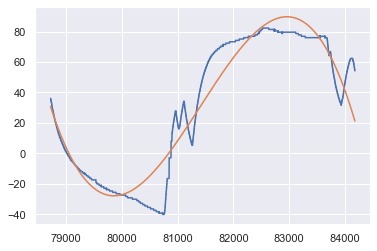

In [72]:
plt.plot(x, y_grad)
plt.plot(x, grad_predicts)

# Рассмотрим второй файл с телеметрией

In [34]:
data_2 = pd.read_csv('Dataset for python part2.csv', encoding='iso-8859-1', sep=';')

data_2.sample(5)

,t_2,amper_per_hour_2,volt_2,grad_2
66562,13276.218,45.73473,NaN,NaN
163283,15456.693,NaN,30.52972,NaN
192740,16081.464,52.22622,NaN,NaN
30662,12330.589,NaN,29.18772,NaN
66431,13273.439,NaN,30.52972,NaN


In [35]:
data_2 = data_2.fillna(0)
data_2

,t_2,amper_per_hour_2,volt_2,grad_2
0,11641.094,0.00000,29.23742,0.0
1,11641.115,48.85065,0.00000,0.0
2,11641.136,0.00000,29.28713,0.0
3,11641.157,48.33133,0.00000,0.0
4,11641.178,0.00000,29.73446,0.0
...,...,...,...,...
199993,16235.323,0.00000,30.13209,0.0
199994,16235.344,51.70690,0.00000,0.0
199995,16235.365,0.00000,29.83387,0.0
199996,16235.387,51.70690,0.00000,26.1


In [36]:
data_2['amper_per_hour_2'][0] = 48.85065
data_2['grad_2'][0] = -19.2

data_2

,t_2,amper_per_hour_2,volt_2,grad_2
0,11641.094,48.85065,29.23742,-19.2
1,11641.115,48.85065,0.00000,0.0
2,11641.136,0.00000,29.28713,0.0
3,11641.157,48.33133,0.00000,0.0
4,11641.178,0.00000,29.73446,0.0
...,...,...,...,...
199993,16235.323,0.00000,30.13209,0.0
199994,16235.344,51.70690,0.00000,0.0
199995,16235.365,0.00000,29.83387,0.0
199996,16235.387,51.70690,0.00000,26.1


In [37]:
for index, row in enumerate(data_2['volt_2']):
    if row == 0:
        data_2['volt_2'][index] = data_2['volt_2'][index-1]

In [38]:
for index, row in enumerate(data_2['amper_per_hour_2']):
    if row == 0:
        data_2['amper_per_hour_2'][index] = data_2['amper_per_hour_2'][index-1]

In [39]:
for index, row in enumerate(data_2['grad_2']):
    if row == 0:
        data_2['grad_2'][index] = data_2['grad_2'][index-1]

In [40]:
x_2 = data_2['t_2'] 

y_amper_2 = data_2['amper_per_hour_2']
y_volt_2 = data_2['volt_2']
y_grad_2 = data_2['grad_2']

data_2

,t_2,amper_per_hour_2,volt_2,grad_2
0,11641.094,48.85065,29.23742,-19.2
1,11641.115,48.85065,29.23742,-19.2
2,11641.136,48.85065,29.28713,-19.2
3,11641.157,48.33133,29.28713,-19.2
4,11641.178,48.33133,29.73446,-19.2
...,...,...,...,...
199993,16235.323,52.48587,30.13209,27.0
199994,16235.344,51.70690,30.13209,27.0
199995,16235.365,51.70690,29.83387,27.0
199996,16235.387,51.70690,29.83387,26.1


In [172]:
data_2 = data_2.drop(data_2[data_2['amper_per_hour_2'] < 40].index)

data_2 = data_2.drop(data_2[data_2['volt_2'] > 32.5].index)


In [194]:
data_2 = data_2.drop(data_2[data_2['volt_2'] <1].index)
data_2

,t_2,amper_per_hour_2,volt_2,grad_2
0,11641.094,48.85065,29.23742,-19.2
1,11641.115,48.85065,29.23742,-19.2
2,11641.136,48.85065,29.28713,-19.2
3,11641.157,48.33133,29.28713,-19.2
4,11641.178,48.33133,29.73446,-19.2
...,...,...,...,...
199993,16235.323,52.48587,30.13209,27.0
199994,16235.344,51.70690,30.13209,27.0
199995,16235.365,51.70690,29.83387,27.0
199996,16235.387,51.70690,29.83387,26.1


# Рассмотрим ампер_2

In [41]:
x_2 = x_2.to_numpy()
x_2 = x_2.reshape(-1, 1)

In [42]:
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [602]:
model_amper_2 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model_amper_2.fit(x_2,y_amper_2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [43]:
amper_predicts_2 = model_amper.predict(x_2)

In [44]:
data_2.drop(data_2.tail(10).index,inplace=True)

In [605]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Test r2: ', r2_score(y_amper_2, amper_predicts_2))

#print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_amper_2, amper_predicts_2))

#print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_amper_2, amper_predicts_2))

Test r2:  0.9440303718695366
Test MSE:  0.40411960683550596
Test MAE:  0.5176402376813374


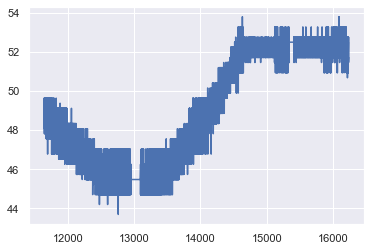

In [606]:
from matplotlib import pyplot as plt
plt.plot(x_2, y_amper_2)

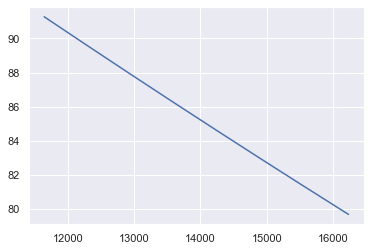

In [46]:
#plt.plot(x_2, y_amper_2)
plt.plot(x_2, amper_predicts_2)

# Рассмотрим вольт_2

In [611]:
model_volt_2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_volt_2.fit(x_2,y_volt_2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [48]:
volt_predicts_2 = model_volt.predict(x_2)

In [613]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Test r2: ', r2_score(y_volt_2, volt_predicts_2))

#print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_volt_2, volt_predicts_2))

#print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_volt_2, volt_predicts_2))

Test r2:  0.6565509399769054
Test MSE:  0.1469116530897429
Test MAE:  0.2898141584978243


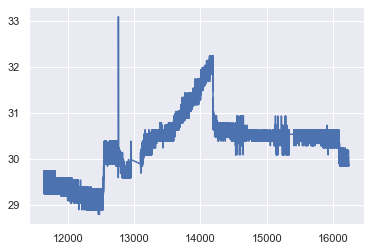

In [49]:
plt.plot(x_2, y_volt_2)

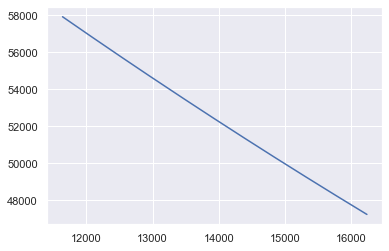

In [51]:
#plt.plot(x_2, y_volt_2)
plt.plot(x_2, volt_predicts_2)

# Рассмотрим градусы_2

In [512]:
model_grad_2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_grad_2.fit(x_2,y_grad_2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [52]:
grad_predicts_2 = model_grad.predict(x_2)

In [513]:
grad_predicts_2 = model_grad_2.predict(x_2)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Test r2: ', r2_score(y_grad_2, grad_predicts_2))

#print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_grad_2, grad_predicts_2))

#print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_grad_2, grad_predicts_2))

Test r2:  0.8836252861499398
Test MSE:  185.83049021112552
Test MAE:  10.072048815843406


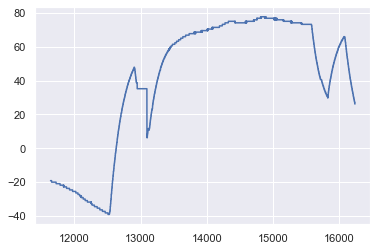

In [53]:
plt.plot(x_2, y_grad_2)

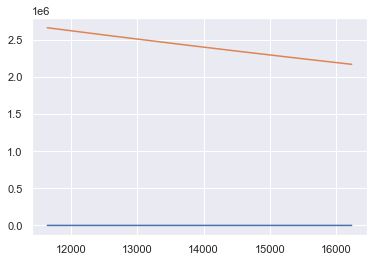

In [54]:
plt.plot(x_2, y_grad_2)
plt.plot(x_2, grad_predicts_2)